<a href="https://colab.research.google.com/github/Sandra69-ms/python_case_study_class_Activity_upload_to_patshala/blob/main/case_study_on_supervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case study  on supervised learning

#INTRODUCTION






In today's data-driven landscape, businesses across various sectors leverage advanced analytics and machine learning to gain a competitive edge. A critical application of these techniques is in understanding and predicting customer behavior. This case study focuses on **churn prediction**, a key supervised learning problem.

Customer churn, or the rate at which customers stop doing business with a company, is a significant challenge. High churn rates can severely impact revenue and growth. By accurately identifying customers at risk of churning, businesses can implement targeted retention strategies, thereby reducing costs and increasing customer lifetime value.

This case study will explore the application of supervised learning algorithms to a dataset containing customer information. Such as:

1.  **Data Loading and Exploration (EDA):** Understanding the structure, characteristics, and potential issues within the dataset.
2.  **Data Preprocessing:** Handling missing values, encoding categorical features, and scaling numerical features to prepare the data for modeling.
3.  **Model Building:** Implementing and training various supervised learning models, such as Logistic Regression, K-Nearest Neighbors (KNN), and Decision Trees.
4.  **Model Evaluation:** Assessing the performance of each model using relevant metrics like accuracy, precision, recall, and F1-score to determine their effectiveness in predicting churn.
5.  **Model Fine-Tuning:** Optimizing the hyperparameters of the selected models to potentially improve their performance.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#data import

In [2]:
data_training = pd.read_csv("/content/Training_data.csv")
data_training

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,NaN,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,5649-RXQTV,Male,0,No,No,51,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15,No
5630,3908-MKIMJ,Male,1,Yes,No,68,No,No phone service,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75,No
5631,4277-BWBML,Male,0,Yes,Yes,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),19.95,1322.85,No
5632,9110-HSGTV,Female,0,No,No,69,Yes,No,DSL,NaN,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.3,No


In [3]:
data_testing = pd.read_csv("/content/Testing_data.csv")
data_testing

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.3,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,2039-JONDJ,Male,0,No,No,27,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),55.45,1477.65,No
1405,2516-VQRRV,Female,1,No,No,2,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.45,158.4,Yes
1406,5570-PTWEH,Female,0,Yes,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.15,216.75,Yes
1407,1722-LDZJS,Male,0,Yes,Yes,53,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.20,1068.15,No


In [4]:
#data_training.head()

In [5]:
#data_testing.head()

In [6]:
data_training.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data_testing.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
data_training.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [9]:
data_testing.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
data_training.nunique()

,0
customerID,5634
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [11]:
data_testing.nunique()

,0
customerID,1409
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


In [12]:
data_training.shape

(5634, 21)

In [13]:
data_testing.shape

(1409, 21)

In [14]:
data_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5465 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5465 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [15]:
data_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [16]:
data_training.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
5629,False
5630,False
5631,False
5632,False


In [17]:
data_testing.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1404,False
1405,False
1406,False
1407,False


In [18]:
data_training.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5240.000000
mean,0.159744,32.606851,65.102052
std,0.366401,24.614976,30.056443
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,36.800000
50%,0.000000,29.000000,70.650000
75%,0.000000,56.000000,90.050000
max,1.000000,72.000000,118.750000


In [19]:
data_testing.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,1409.000000,1409.000000,1409.000000
mean,0.171753,31.428673,63.898013
std,0.377300,24.322161,30.282693
min,0.000000,0.000000,18.700000
25%,0.000000,8.000000,30.100000
50%,0.000000,27.000000,69.900000
75%,0.000000,54.000000,89.500000
max,1.000000,72.000000,118.600000


In [20]:
pd.value_counts(data_training['gender'])

/tmp/ipython-input-3978073554.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(data_training['gender'])


,count
gender,
Male,2744
Female,2721


# EDA

Train Data

In [21]:
num_cols =  data_training.select_dtypes(include =['int64','float64'])


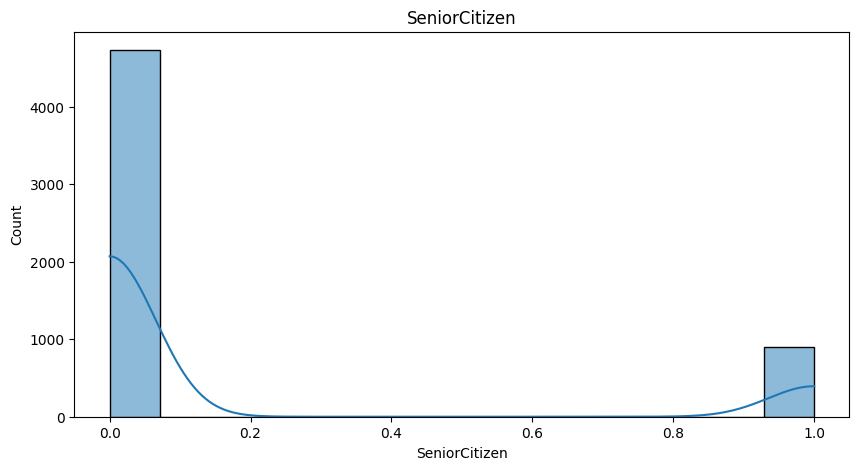

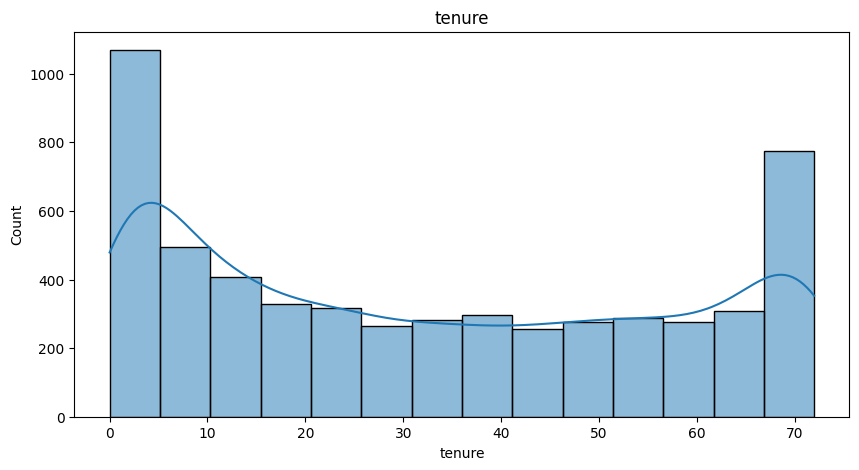

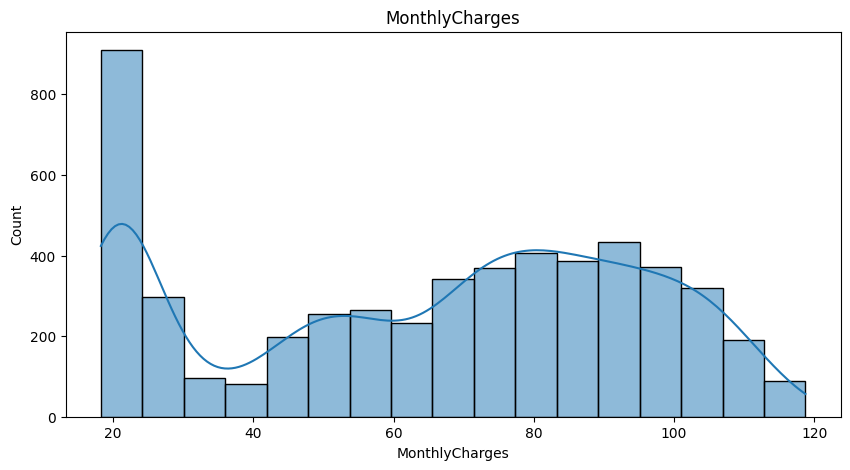

In [22]:
for i in num_cols:
 plt.figure(figsize=(10,5))
 sns.histplot(data = data_training,x=i,kde=True)
 plt.title(i)

In [23]:
cat_data =  data_training.select_dtypes(include= 'object')

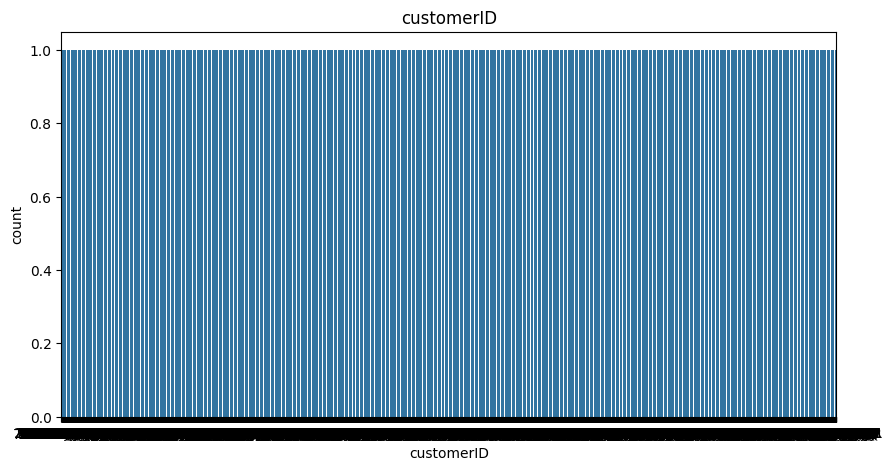

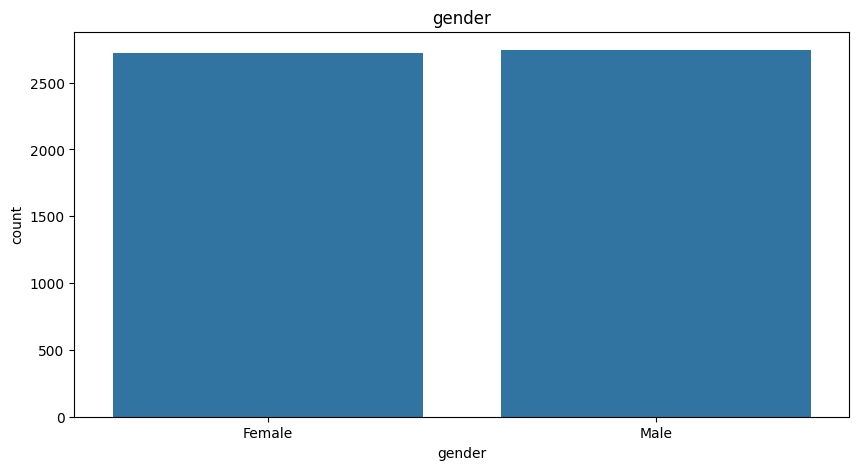

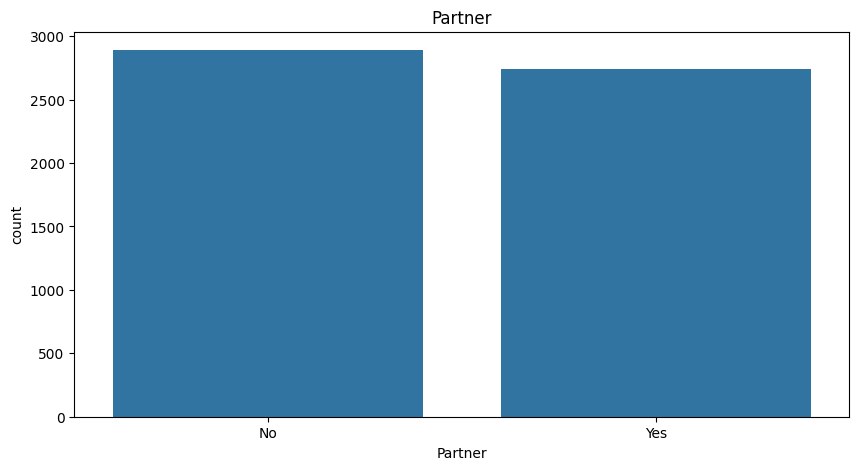

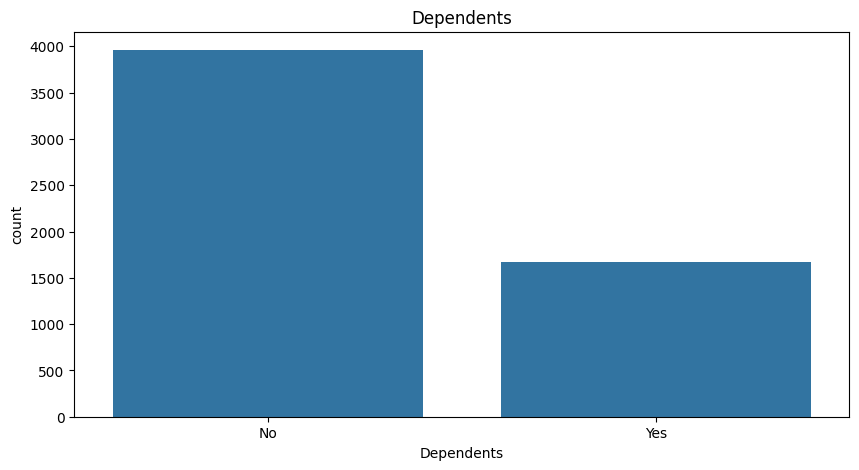

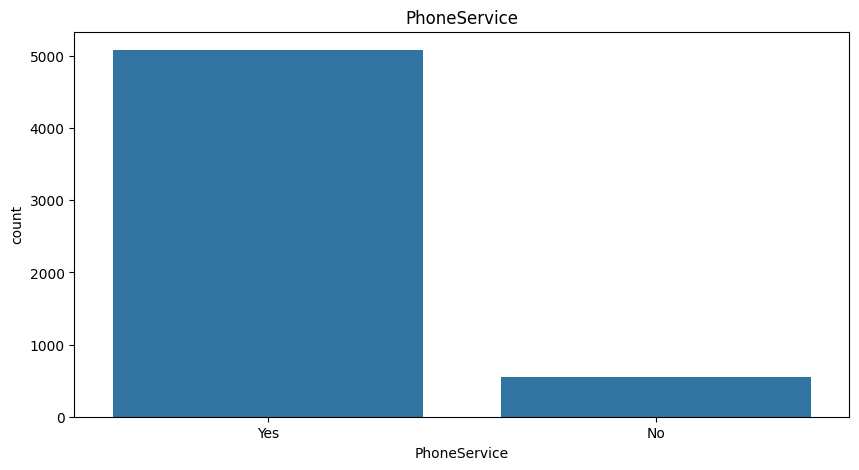

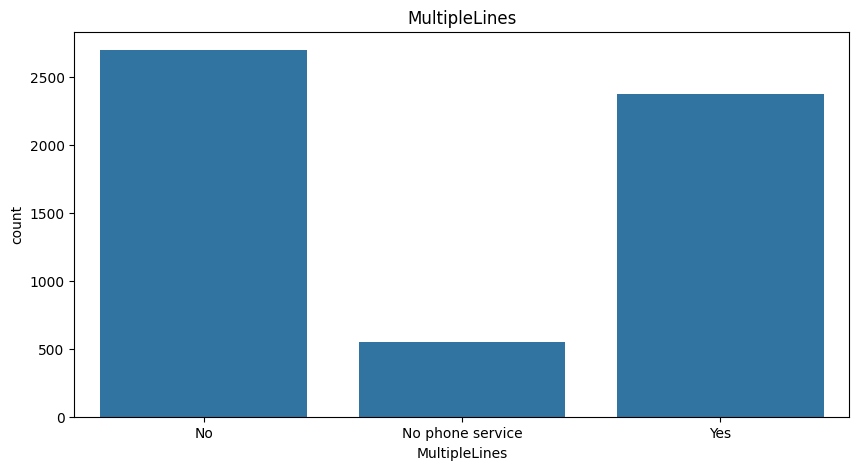

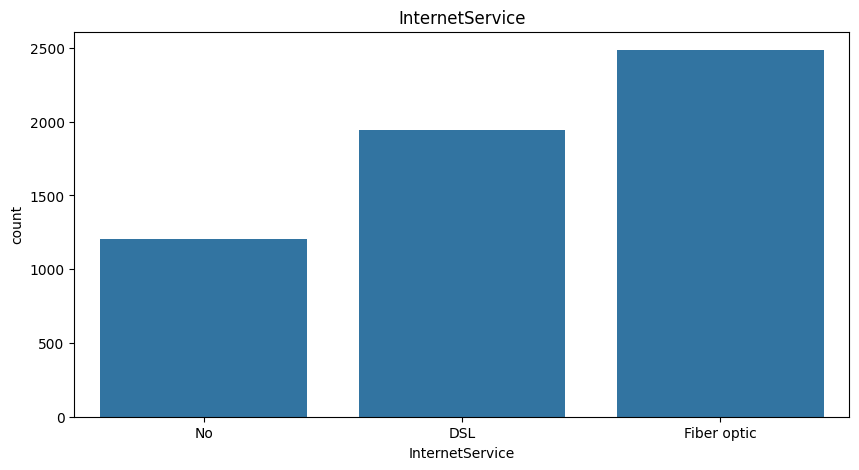

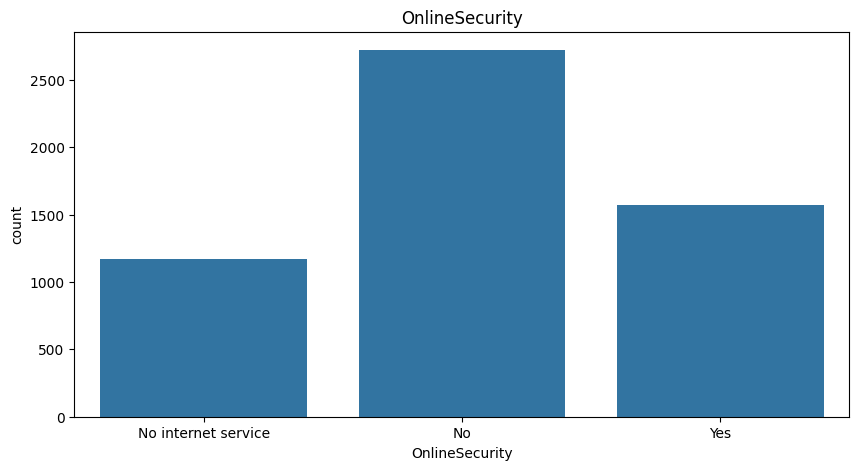

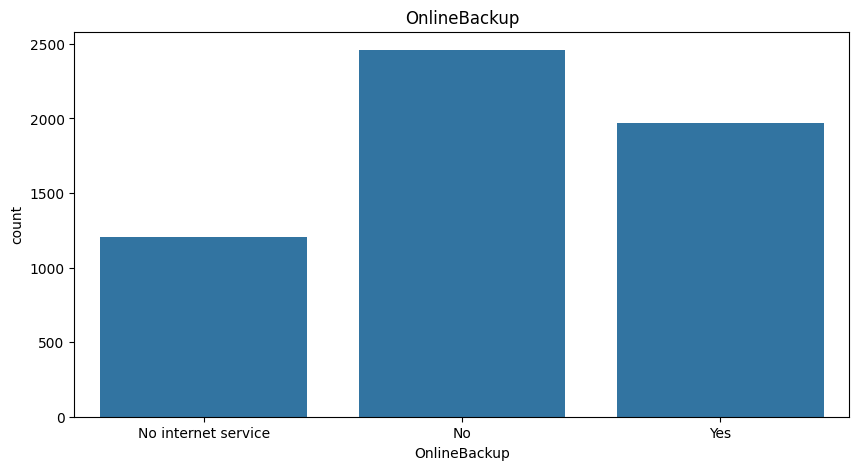

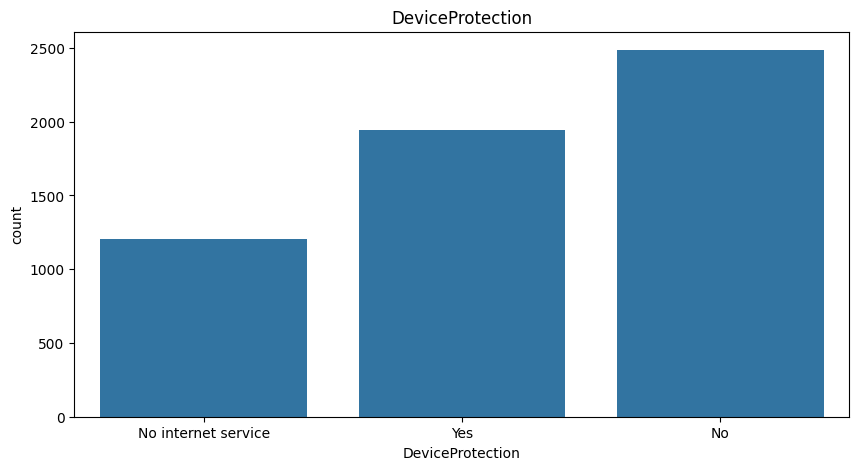

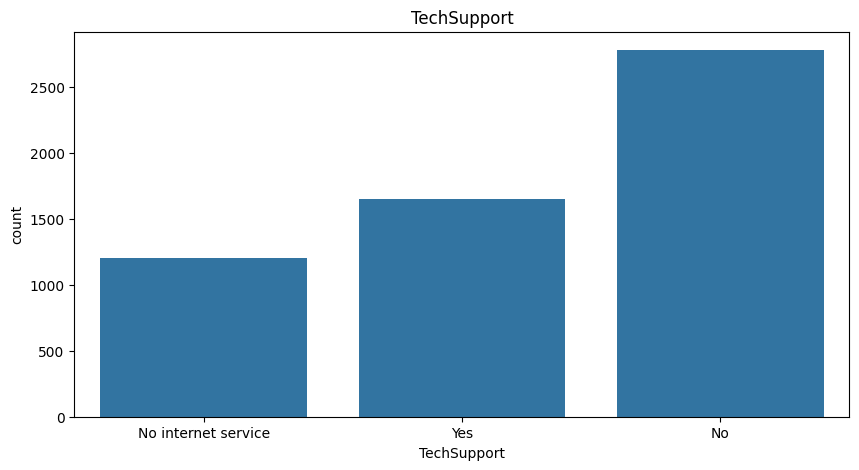

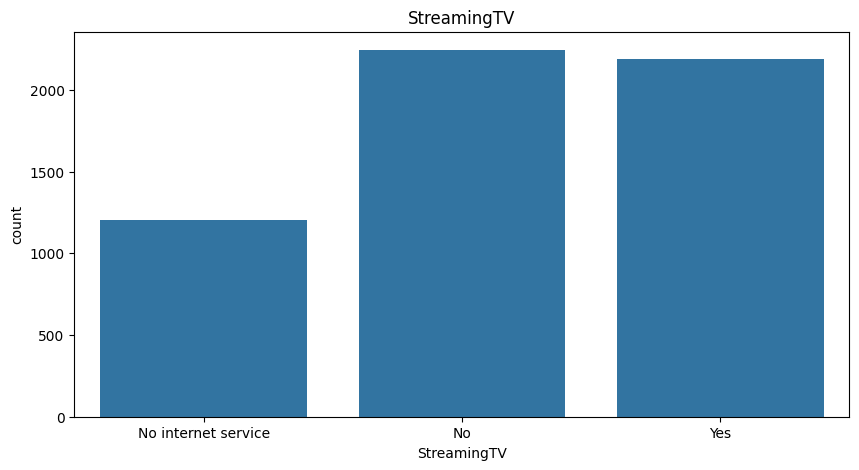

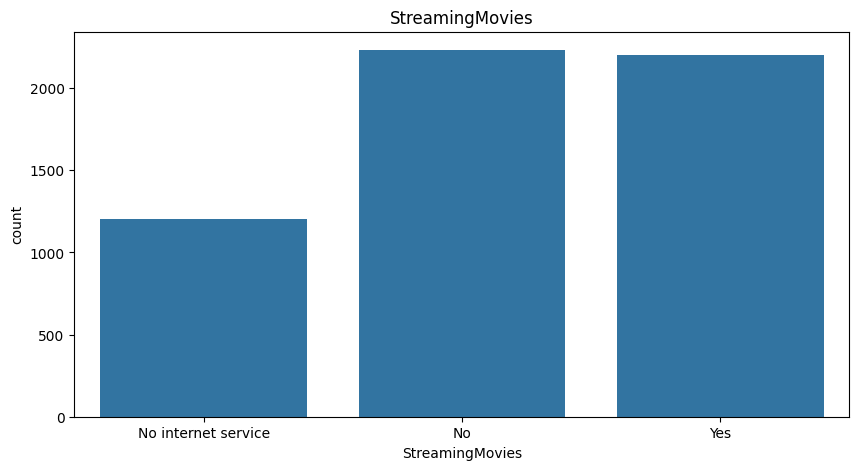

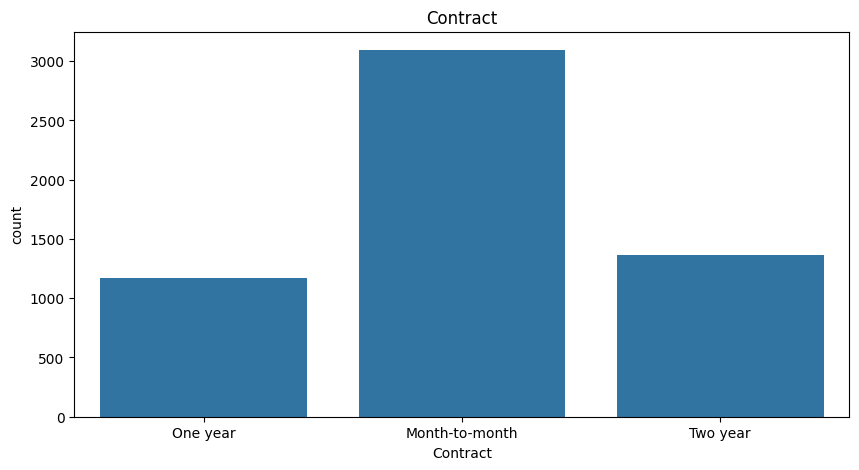

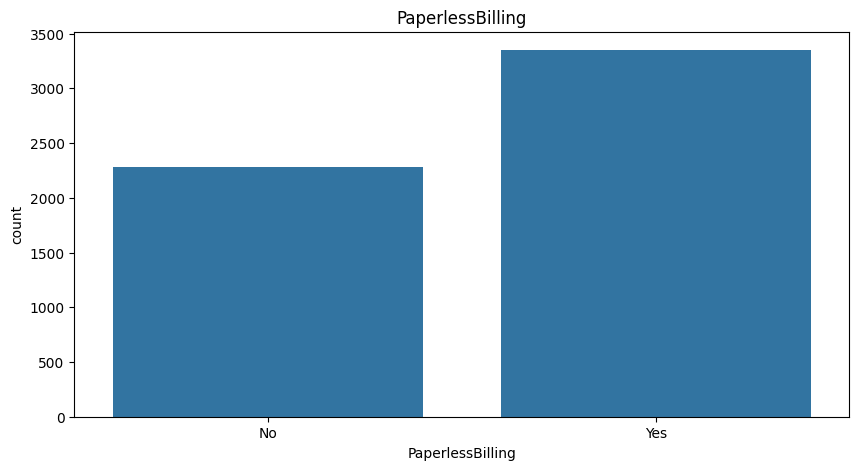

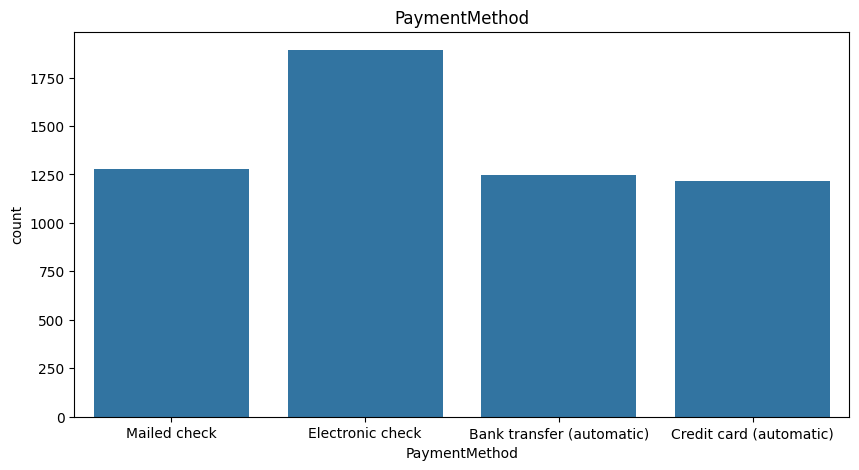

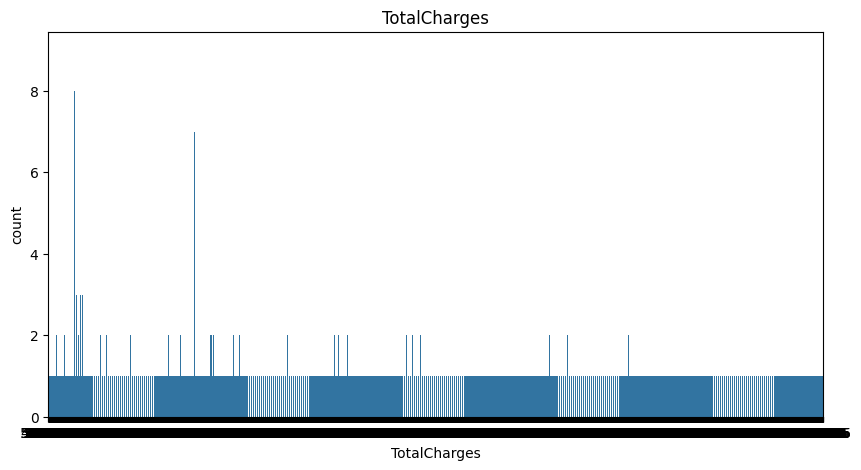

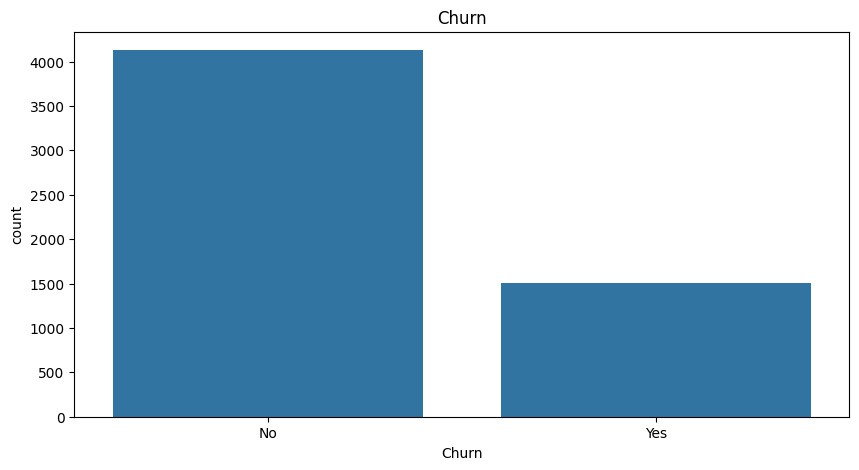

In [24]:
for i in cat_data:
 plt.figure(figsize=(10,5))
 sns.countplot(data = data_training,x=i)
 plt.title(i)

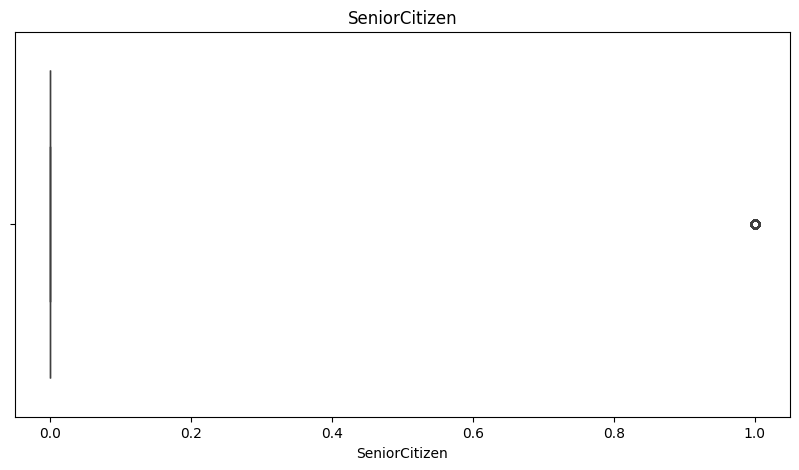

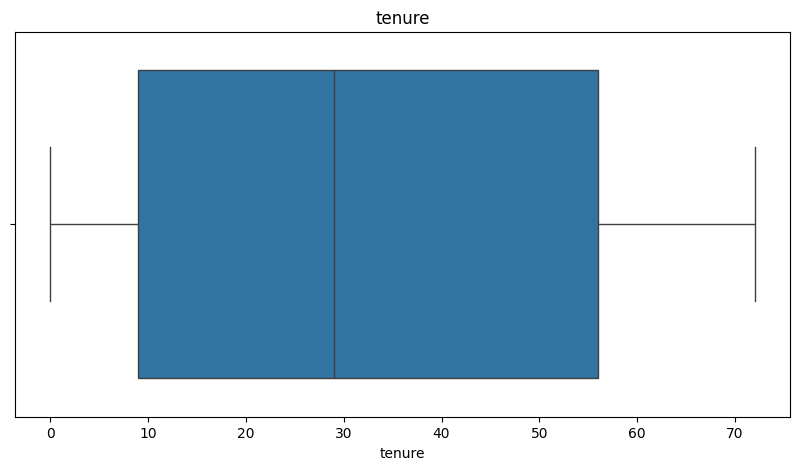

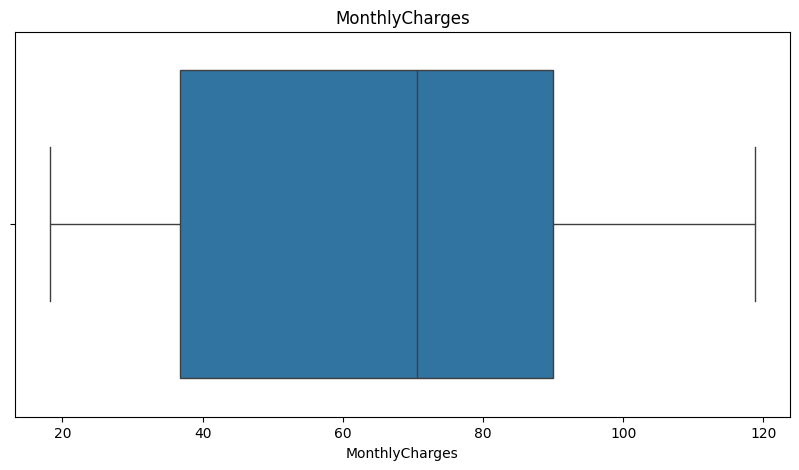

In [25]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = data_training,x=i)
  plt.title(i)

Test data

In [26]:
num_colums =  data_testing.select_dtypes(include =['int64','float64'])


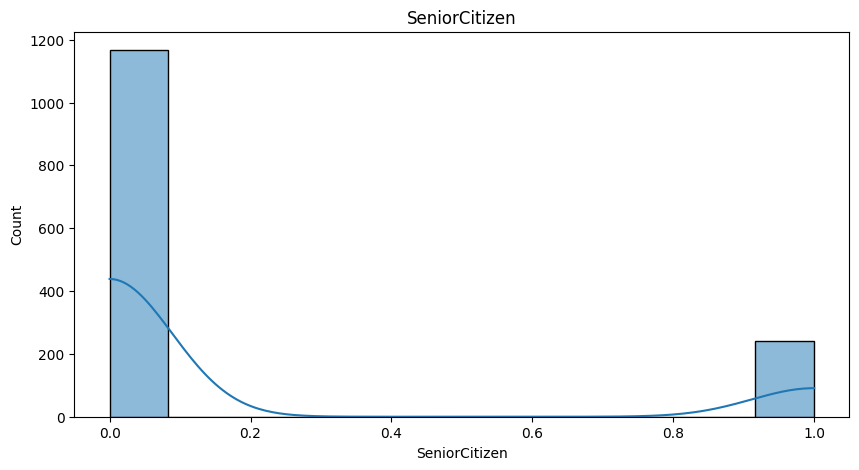

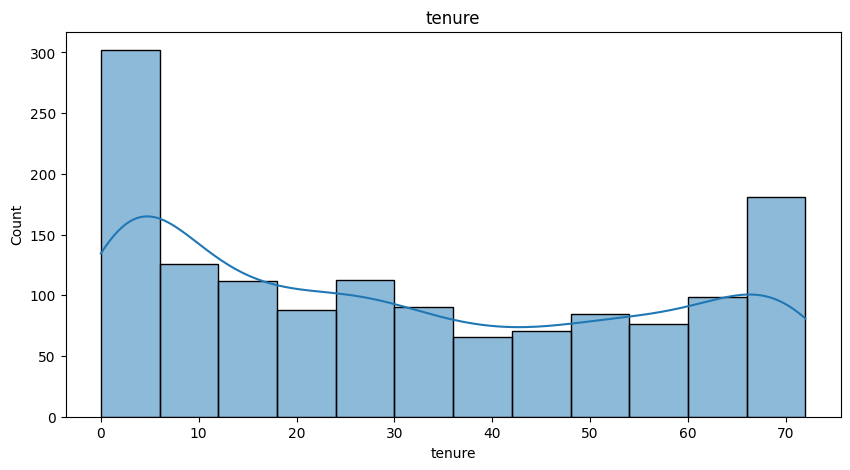

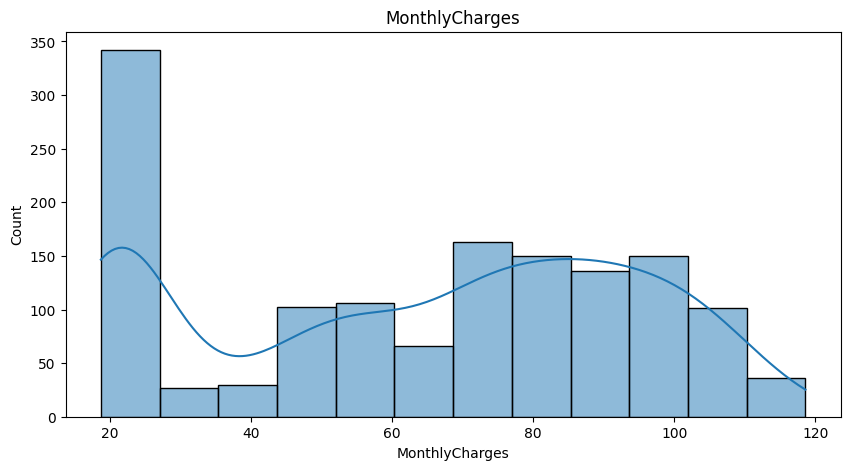

In [27]:
for i in num_colums:
  plt.figure(figsize=(10,5))
  sns.histplot(data = data_testing,x=i,kde=True)
  plt.title(i)

In [28]:
cata_data = data_testing.select_dtypes(include='object')

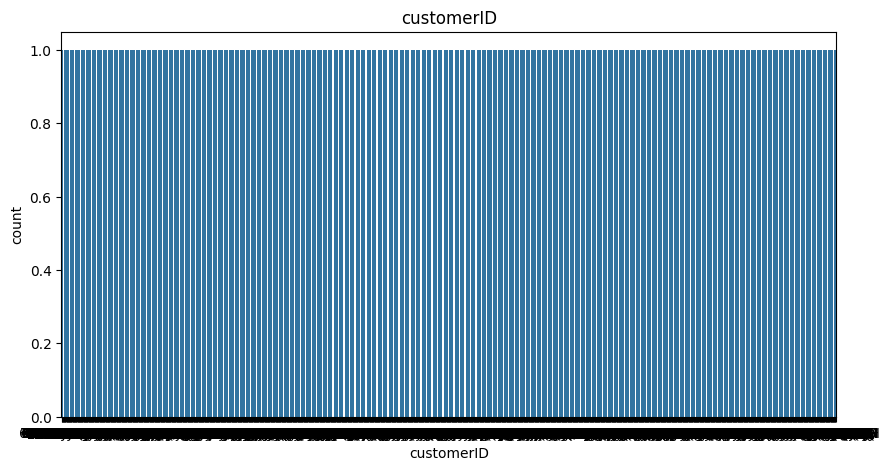

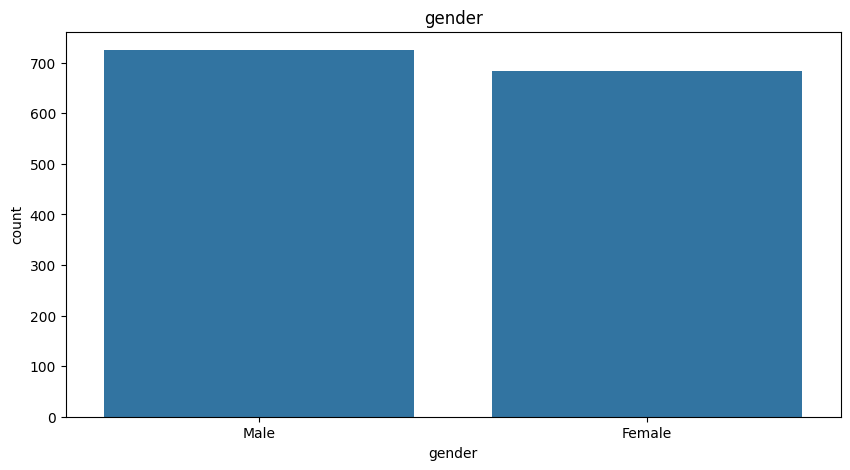

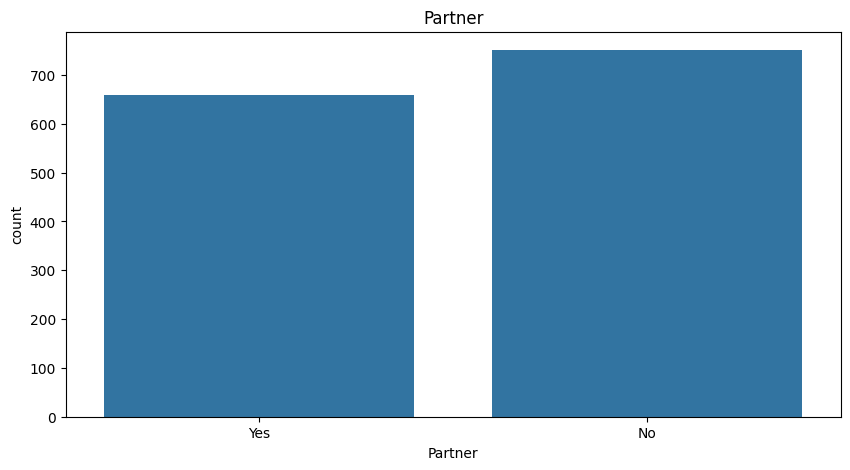

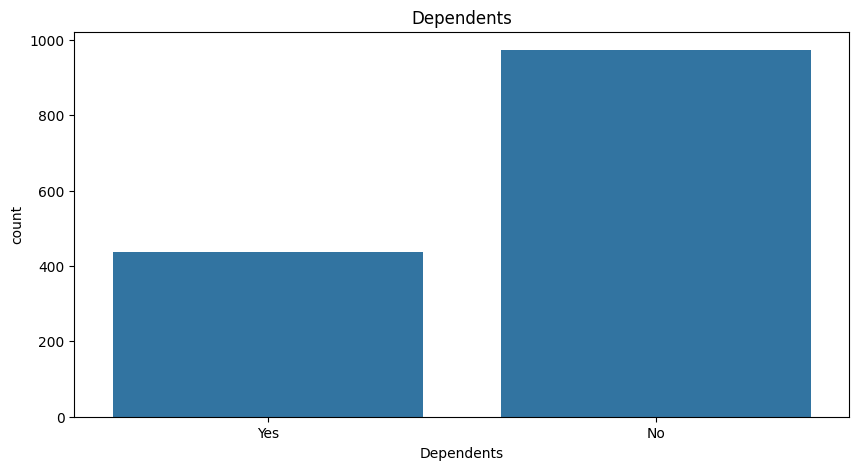

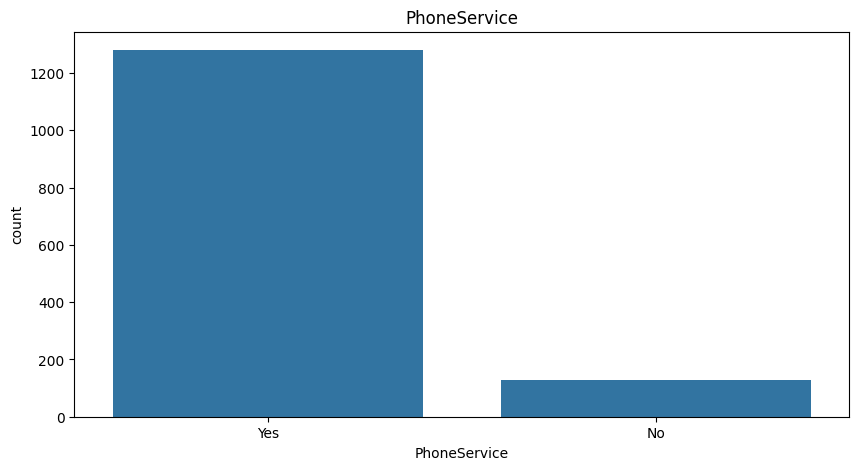

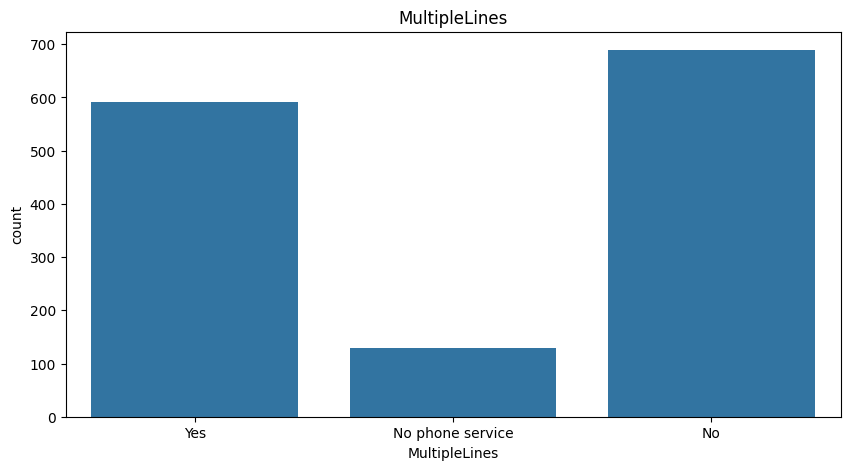

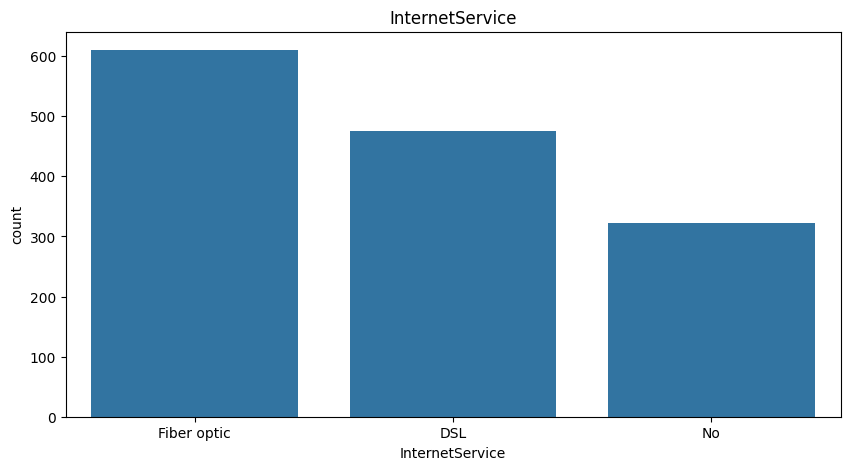

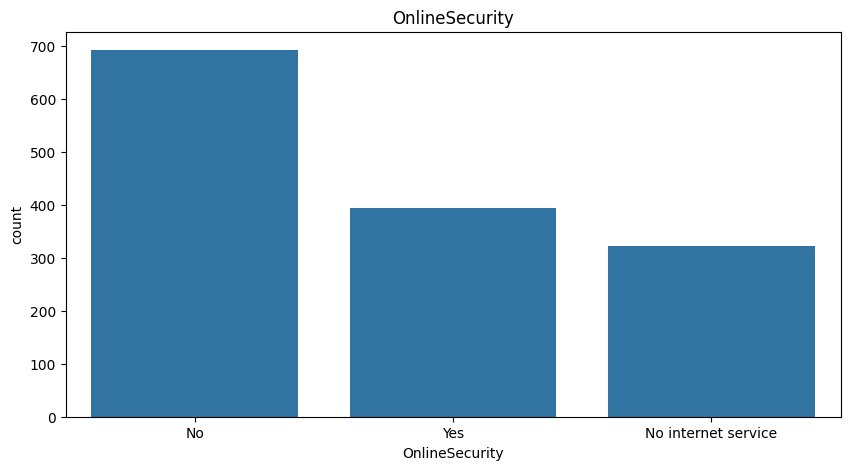

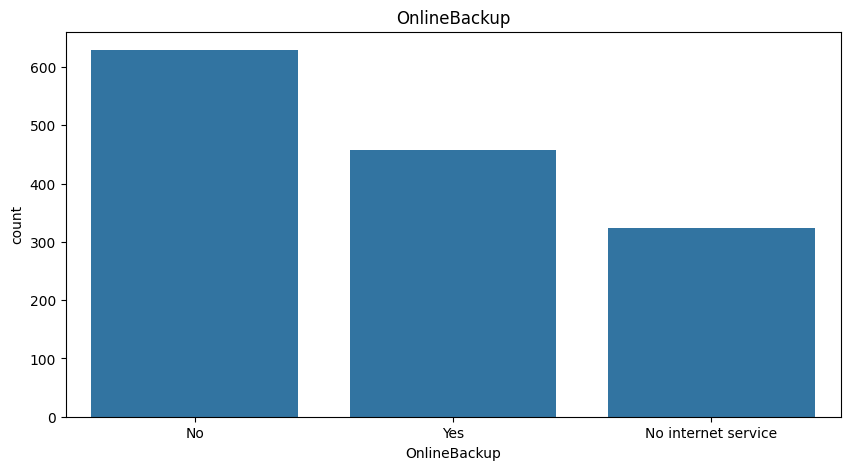

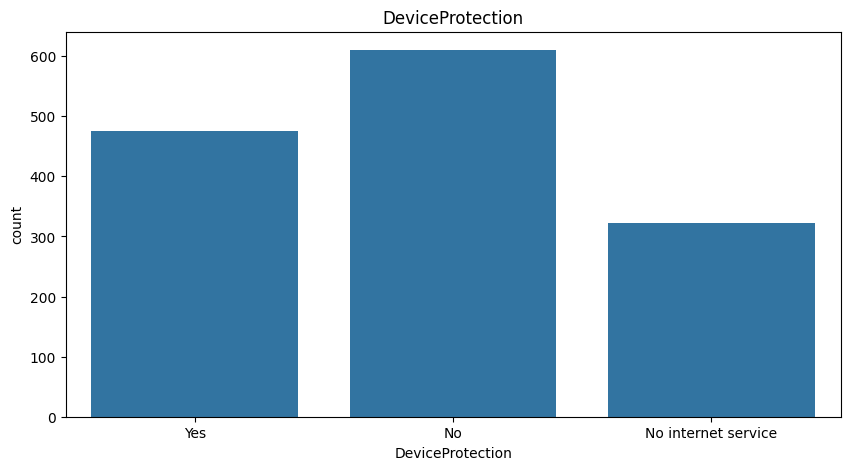

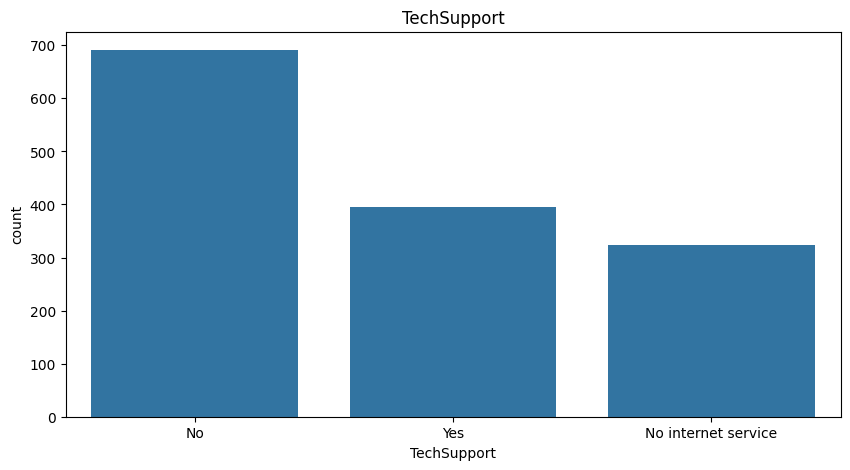

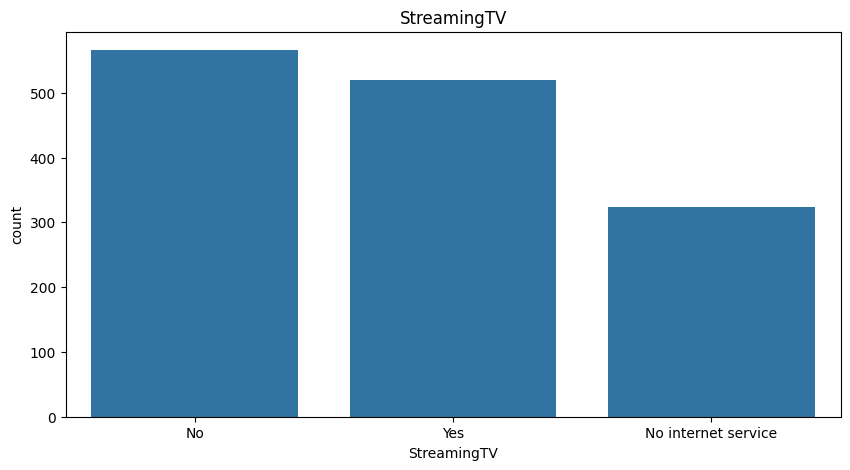

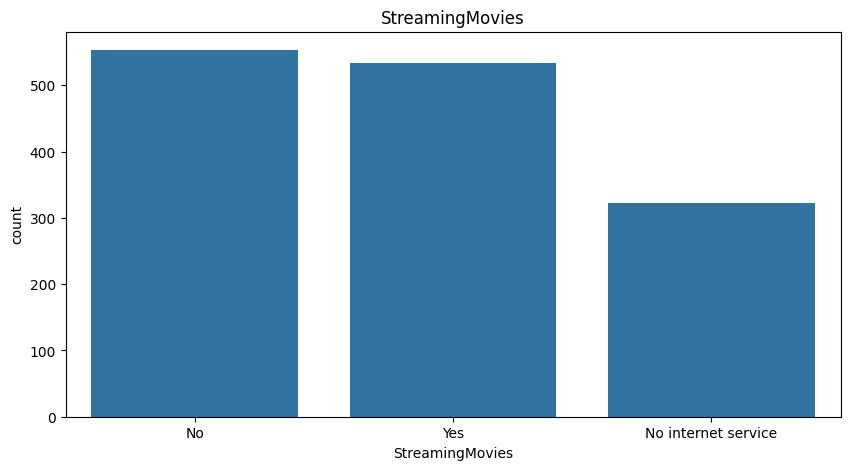

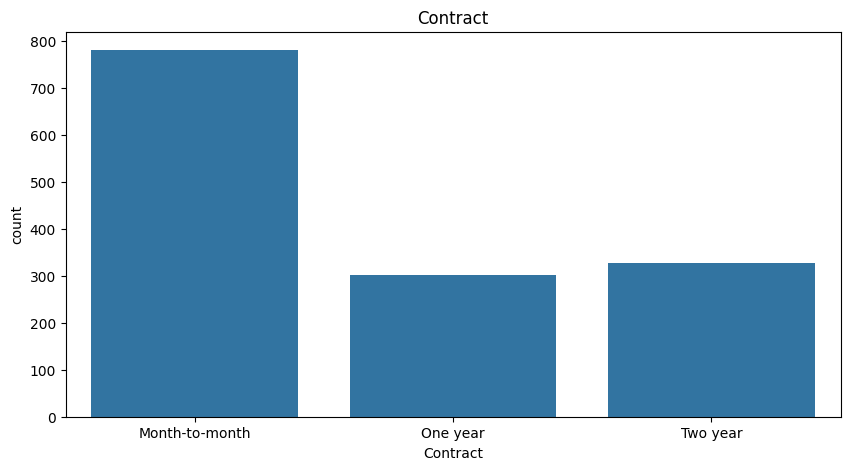

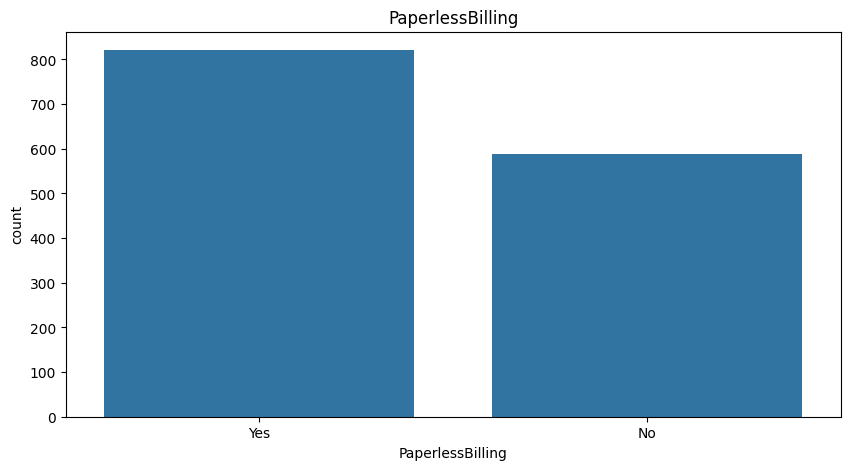

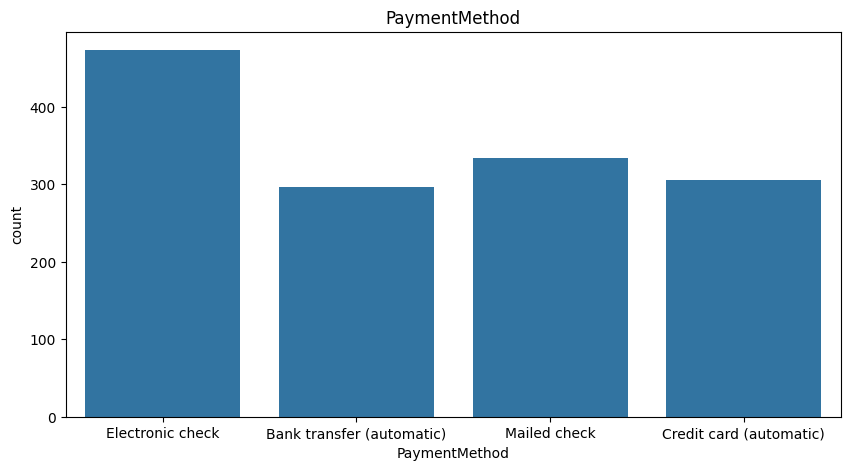

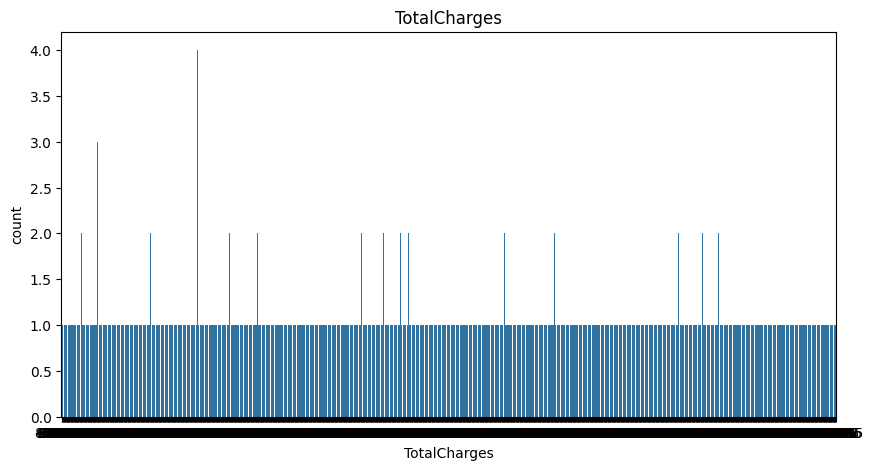

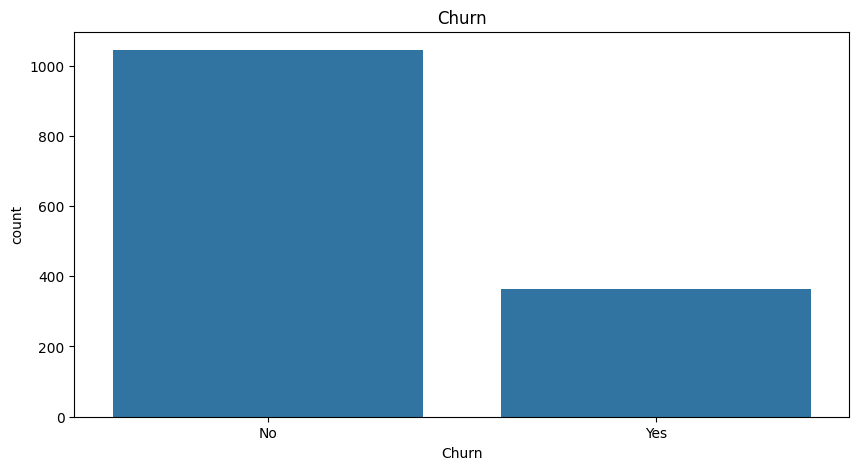

In [29]:
for i in cata_data:
  plt.figure(figsize=(10,5))
  sns.countplot(data = data_testing,x=i)
  plt.title(i)

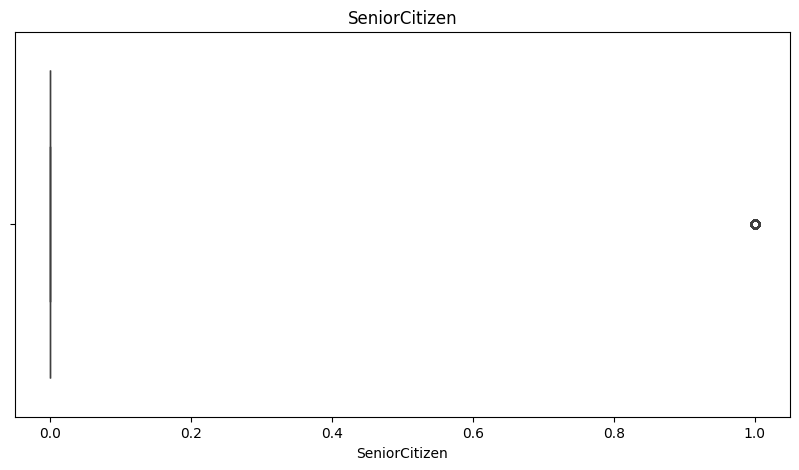

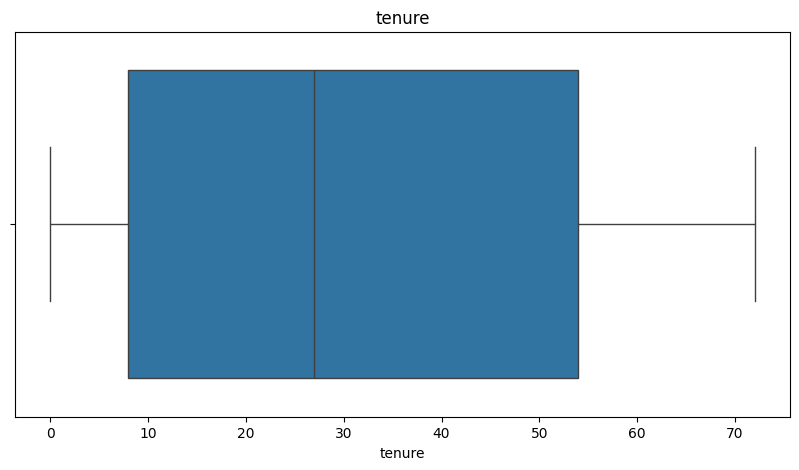

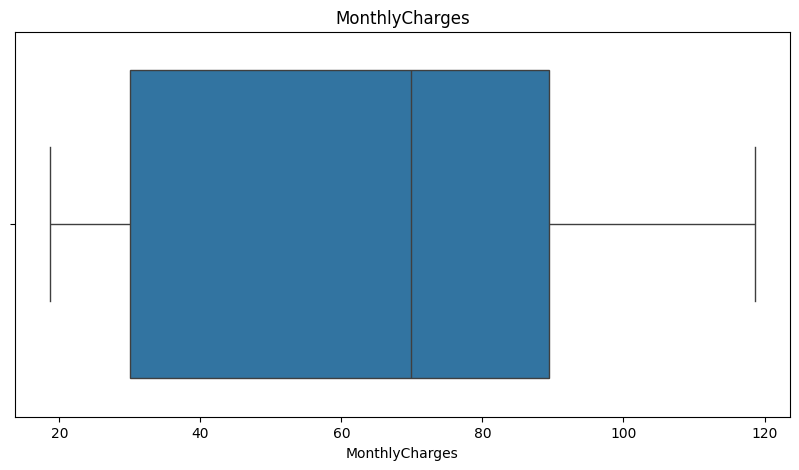

In [30]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  sns.boxplot(data = data_testing,x=i)
  plt.title(i)

# Handling missing value

Training data

In [31]:
data_training.isna().sum()

,0
customerID,0
gender,169
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,169


In [32]:
data_training['gender'] = data_training['gender'].fillna(data_training['gender'].mode()[0])

#This code fills missing values in the 'gender' column of the data DataFrame. It uses the fillna() method to replace the missing values with the mode (the most frequent value) of the 'gender' column. The mode()[0] is used because the mode() method can return multiple values if there's a tie, and we only need the first one.

In [33]:
data_training.loc[(data_training['OnlineSecurity'].isna())&(data_training['InternetService']=='No'),'OnlineSecurity'] = 'No internet service'

In [34]:
#data_training.isna().sum()

In [35]:
count = data_training.groupby('InternetService')['OnlineSecurity'].value_counts()
count

InternetService  OnlineSecurity     
DSL              No                      955
                 Yes                     921
Fiber optic      No                     1765
                 Yes                     653
No               No internet service    1203
Name: count, dtype: int64

In [36]:
import random

online_security_option = ['Yes','No']
data_training['OnlineSecurity'] = data_training['OnlineSecurity'].fillna(random.choice(online_security_option))

In [37]:
data_training.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [38]:
# monthly charges

data_training['MonthlyCharges'] = data_training['MonthlyCharges'].fillna(data_training['MonthlyCharges'].median())

In [39]:
#Total charges
data_training['TotalCharges'] = pd.to_numeric(data_training['TotalCharges'], errors='coerce')
data_training['TotalCharges'] = data_training['TotalCharges'].fillna(data_training['TotalCharges'].median())

In [40]:
data_training.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [115]:
pd.Series(data_training['OnlineSecurity']).value_counts()

,count
OnlineSecurity,
No,4060
Yes,1574


In [116]:
data_training['OnlineSecurity'] = data_training['OnlineSecurity'].replace({'No internet service': 'No'})

In [119]:
pd.Series(data_training['OnlineSecurity']).value_counts()

,count
OnlineSecurity,
No,4060
Yes,1574


In [44]:
data_training.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No phone service,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No


In [45]:
data_training['TotalCharges']=data_training['TotalCharges'].replace(' ', np.nan)

In [46]:
data_training['TotalCharges'] =data_training['TotalCharges'].astype('float64')

In [47]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with a median strategy
imputer = SimpleImputer(strategy='median')

# Reshape the 'TotalCharges' column to be 2D for the imputer
total_charges_reshaped = data_training['TotalCharges'].values.reshape(-1, 1)

# Fit and transform the column
data_training['TotalCharges'] = imputer.fit_transform(total_charges_reshaped)

# Verify that missing values are filled
print(data_training['TotalCharges'].isna().sum())

0


In [48]:
data_training.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [49]:
data_training[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']] = data_training[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [50]:
data_training['MultipleLines'] = data_training['MultipleLines'].replace('No phone service', 'No')

#This code replaces all occurrences of the string 'No phone service' with the string 'No' in the 'MultipleLines' column of your data_training DataFrame.
#This is a data cleaning step to standardize the values in that column

In [51]:
data_training.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,9509-MPYOD,Female,0,No,No,35,Yes,No,No,No,...,No,No,No,No,One year,No,Mailed check,20.75,700.45,No
1,7746-AWNQW,Female,0,No,No,28,No,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40,No
2,2208-UGTGR,Male,0,No,No,56,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05,No
3,4884-LEVMQ,Male,0,Yes,No,39,Yes,No,No,No,...,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00,No
4,6682-VCIXC,Female,0,Yes,Yes,43,No,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60,No
5,7048-GXDAY,Male,0,No,No,39,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.40,4040.65,No
6,4697-LUPSU,Male,0,Yes,Yes,2,Yes,No,No,No,...,No,No,No,No,One year,No,Mailed check,20.20,34.75,No
7,2432-TFSMK,Male,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),89.60,1633.00,No
8,2027-WKXMW,Female,0,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,108.75,6871.70,No
9,4826-TZEVA,Female,0,No,No,40,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Credit card (automatic),74.80,1396.45,No


Test data

In [52]:
data_testing.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [53]:
data_testing[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']] = data_testing[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingMovies','StreamingTV']].replace('No internet service', 'No')

In [54]:
data_testing['MultipleLines'] = data_testing['MultipleLines'].replace('No phone service', 'No')

In [55]:
data_testing['TotalCharges']=data_testing['TotalCharges'].replace(' ', np.nan)

In [56]:
data_testing['TotalCharges'] = data_testing['TotalCharges'].astype(float)


In [57]:
data_testing['TotalCharges'] = data_testing['TotalCharges'].fillna(data_testing['TotalCharges'].median())

In [58]:
data_testing.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6080-TCMYC,Male,0,Yes,Yes,40,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.20,3292.30,No
1,7285-KLOTR,Female,0,Yes,No,12,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Electronic check,78.85,876.75,No
2,7486-KSRVI,Male,0,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,One year,Yes,Electronic check,100.00,4211.55,Yes
3,9924-JPRMC,Male,0,No,No,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Electronic check,118.20,8547.15,No
4,4439-YRNVD,Female,0,No,No,10,No,No,DSL,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,36.25,374.00,No
5,4109-CYRBD,Male,1,Yes,No,29,Yes,Yes,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,51.60,1442.00,No
6,6034-ZRYCV,Female,0,Yes,No,72,No,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Electronic check,54.20,3937.45,Yes
7,6408-OTUBZ,Female,0,No,No,66,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),104.55,6779.05,No
8,5304-EFJLP,Male,1,Yes,No,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),111.65,8022.85,No
9,8859-AXJZP,Male,0,Yes,Yes,39,Yes,Yes,No,No,...,No,No,No,No,Two year,Yes,Mailed check,23.80,903.80,No


# Splitting

Training

In [59]:
x_train_numerical=data_training.select_dtypes(include=['int64','float64'])
x_train_categorical =data_training.select_dtypes(include='object')

In [60]:
y_train = data_training['Churn']
x_train = data_training.drop(['Churn','customerID'], axis=1)

Testing

In [61]:

x_test_numerical =data_testing.select_dtypes(include=['int64','float64'])
x_test_categorical= data_testing.select_dtypes(include='object')


In [62]:
y_test = data_testing['Churn']
x_test = data_testing.drop(['Churn','customerID'], axis=1)

# Encoding

In [63]:
from sklearn.preprocessing import LabelEncoder

In [64]:
label_enc = LabelEncoder()

In [65]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,No,No,35,Yes,No,No,No,No,No,No,No,No,One year,No,Mailed check,20.75,700.45
1,Female,0,No,No,28,No,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.40
2,Male,0,No,No,56,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,No,Electronic check,98.60,5581.05
3,Male,0,Yes,No,39,Yes,No,No,No,No,No,No,No,No,Two year,Yes,Bank transfer (automatic),20.45,790.00
4,Female,0,Yes,Yes,43,No,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),51.25,2151.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,Male,0,No,No,51,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.00,5038.15
5630,Male,1,Yes,No,68,No,No,DSL,Yes,Yes,Yes,No,No,No,Two year,Yes,Electronic check,41.95,2965.75
5631,Male,0,Yes,Yes,72,Yes,No,No,No,No,No,No,No,No,Two year,No,Bank transfer (automatic),19.95,1322.85
5632,Female,0,No,No,69,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),82.45,5555.30


In [66]:
x_train_catag=x_train.select_dtypes(include='object')
x_train_catag
x_train_num =x_train.select_dtypes(include=['float64','int64'])

In [67]:
for i in x_train_catag:
 x_train[i]=label_enc.fit_transform(x_train[i])

In [68]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,35,1,0,2,0,0,0,0,0,0,1,0,3,20.75,700.45
1,0,0,0,0,28,0,0,0,0,0,1,1,0,0,0,1,3,35.75,961.40
2,1,0,0,0,56,1,1,1,0,1,0,0,1,1,0,0,2,98.60,5581.05
3,1,0,1,0,39,1,0,2,0,0,0,0,0,0,2,1,0,20.45,790.00
4,0,0,1,1,43,0,0,0,0,1,0,1,1,0,1,1,0,51.25,2151.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,1,0,0,0,51,1,0,1,0,1,1,0,1,1,0,1,2,99.00,5038.15
5630,1,1,1,0,68,0,0,0,1,1,1,0,0,0,2,1,2,41.95,2965.75
5631,1,0,1,1,72,1,0,2,0,0,0,0,0,0,2,0,0,19.95,1322.85
5632,0,0,0,0,69,1,0,0,0,0,1,1,1,1,2,1,1,82.45,5555.30


In [69]:
for i in x_train_catag:
 x_test[i]=label_enc.fit_transform(x_test[i])

In [70]:
x_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,1,0,1,1,40,1,1,1,0,0,1,0,0,0,0,1,2,81.20,3292.30
1,0,0,1,0,12,1,1,0,1,0,1,0,1,1,1,0,2,78.85,876.75
2,1,0,0,0,43,1,1,1,0,0,0,1,1,1,1,1,2,100.00,4211.55
3,1,0,0,0,72,1,1,1,1,1,1,1,1,1,2,1,2,118.20,8547.15
4,0,0,0,0,10,0,0,0,0,1,0,1,0,0,0,0,2,36.25,374.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1,0,0,0,27,1,0,0,1,1,0,0,0,0,1,0,0,55.45,1477.65
1405,0,1,0,0,2,1,1,1,0,0,0,0,0,0,0,1,3,75.45,158.40
1406,0,0,1,0,3,1,1,1,0,0,0,0,0,0,0,1,1,75.15,216.75
1407,1,0,1,1,53,1,0,2,0,0,0,0,0,0,1,0,1,20.20,1068.15


In [71]:
y_test = label_enc.fit_transform(y_test)
y_train = label_enc.fit_transform(y_train)

In [72]:
y_test

array([0, 0, 1, ..., 1, 0, 0])

In [73]:
y_train

array([0, 0, 0, ..., 0, 0, 0])

# Scalling

In [74]:
from scipy.stats import skew


In [75]:
skewness = x_train_num.skew()
skewness

,0
SeniorCitizen,1.857943
tenure,0.227944
MonthlyCharges,-0.283808
TotalCharges,1.039322


In [76]:
from sklearn.preprocessing import StandardScaler,PowerTransformer

In [77]:
std_sclar = StandardScaler()

In [78]:
pwr_sclar = PowerTransformer()

training , testing

In [79]:
x_train['tenure'] = std_sclar.fit_transform(x_train[['tenure']])

In [80]:
x_test['tenure'] = std_sclar.fit_transform(x_test[['tenure']])

In [81]:
x_train['MonthlyCharges'] = std_sclar.fit_transform(x_train[['MonthlyCharges']])

In [82]:
x_test['MonthlyCharges'] = std_sclar.fit_transform(x_test[['MonthlyCharges']])

In [83]:
x_train['TotalCharges'] = pwr_sclar.fit_transform(x_train[['TotalCharges']])

In [84]:
x_test['TotalCharges'] = pwr_sclar.fit_transform(x_test[['TotalCharges']])

# MODEL BUILDING

# 1.  Logistic  regression

In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
logic_model =LogisticRegression(max_iter=100)

In [87]:

logic_model.fit(x_train,y_train)
y_pred = logic_model.predict(x_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score, f1_score

In [89]:
print('Accuracy is',accuracy_score(y_test,y_pred))

Accuracy is 0.8105039034776437


In [90]:
print('precision is',precision_score(y_test,y_pred))

precision is 0.6737588652482269


In [91]:
print('recall is',recall_score(y_test,y_pred))

recall is 0.5205479452054794


In [92]:
print('f1score is',f1_score(y_test,y_pred))

f1score is 0.5873261205564142


# 2. KNN

In [93]:
from sklearn.neighbors import KNeighborsClassifier

In [94]:
metric_k =[]
neighbours = np.arange(3,50)

In [95]:
for k in neighbours :
  classifier = KNeighborsClassifier(n_neighbors=k,metric="minkowski",p=2)
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  acc = accuracy_score(y_test,y_pred)
  metric_k.append(acc)

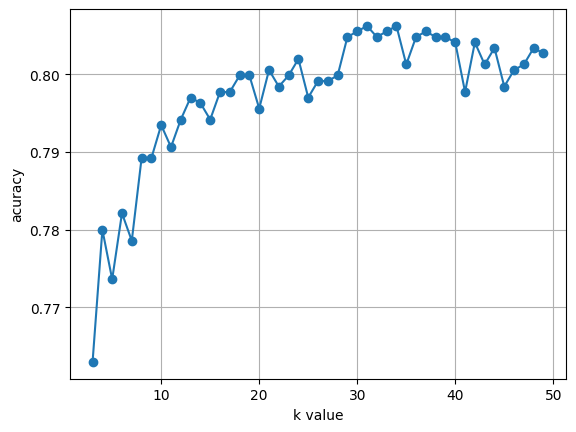

In [96]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('acuracy')
plt.grid()

In [97]:
classifier = KNeighborsClassifier(n_neighbors=32, metric='minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [98]:
y_pred_knn

array([0, 0, 0, ..., 1, 0, 0])

In [99]:
print('Accuracy is',accuracy_score(y_test,y_pred_knn))

Accuracy is 0.8048261178140526


In [100]:
print('precision is',precision_score(y_test,y_pred_knn))

precision is 0.652027027027027


In [101]:
print("Recall is ", recall_score(y_test,y_pred_knn))

Recall is  0.5287671232876713


In [102]:
print("f1 score is", f1_score(y_test,y_pred_knn))



f1 score is 0.583963691376702


# 3. Decision Tree

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

In [104]:
decision_clf = DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=42,min_samples_split=12,splitter='random')
decision_clf.fit(x_train, y_train)
y_pred = decision_clf.predict(x_test)


In [105]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7735982966643009


In [106]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[937 107]
 [212 153]]


In [107]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.85      1044
           1       0.59      0.42      0.49       365

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.76      0.77      0.76      1409



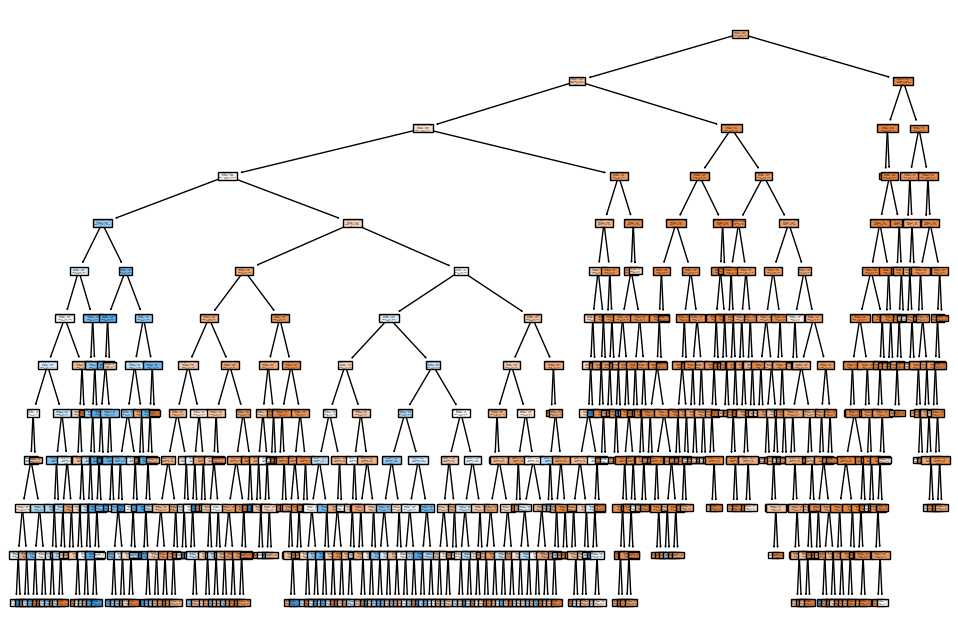

In [108]:
# Visualize the decision tree
class_labels = sorted(set(y_train))

plt.figure(figsize=(12, 8))
tree.plot_tree(decision_clf,
               feature_names=x_train.columns,  # if x_train is a DataFrame
               class_names=[str(label) for label in class_labels],
               filled=True)
plt.show()

# MODEL EVALUATION

**1. Logistic Regression:**

Accuracy: 0.8105

Precision: 0.6738

Recall: 0.5205

F1-score: 0.5873

**Insights**: Logistic Regression has the highest overall accuracy among the three models. However, its recall is relatively low, indicating that it's not as good at identifying all the positive cases (churn). The precision is decent, meaning that when it predicts churn, it's reasonably likely to be correct.


 **2. KNN :**

Accuracy: 0.8048

Precision: 0.6520

Recall: 0.5288

F1-score: 0.5840

**Insights**: The initial KNN model had an accuracy of about 80.5%. It had a precision of around 65.2%, meaning that when it predicted a customer would churn, it was correct about 65% of the time. The recall was about 52.9%, indicating that it identified slightly over half of the actual churn cases. The F1-score, which balances precision and recall, was around 58.4%.

 **3. Decision Tree:**

Accuracy: 0.7736

Confusion Matrix: [[937 107], [212 153]]

Classification Report:
Precision (Churn): 0.59

Recall (Churn): 0.42

F1-score (Churn): 0.49

**Insights**: The Decision Tree model has the lowest accuracy among the three. Its recall is significantly lower than Logistic Regression and KNN, meaning it misses a larger proportion of actual churn cases. While its precision is also lower, the F1-score reflects a weaker balance between precision and recall compared to the other models. The visualized tree shows the decision rules the model is using, which can provide insights into the features that are most important for predicting churn (e.g., tenure, monthly charges, contract type).

4 Overall Comparison:

**Accuracy**: Logistic Regression performs the best in terms of overall accuracy.

**Identifying Churn (Recall):** KNN has a slightly better recall than Logistic Regression, meaning it identifies slightly more churn cases. Decision Tree has the lowest recall.


**Correct Churn Predictions (Precision)**: Logistic Regression has the highest precision, indicating that its churn predictions are more reliable. KNN and Decision Tree have lower precision.


**Balancing Precision and Recall (F1-score)**: Logistic Regression has the highest F1-score, suggesting the best balance between precision and recall.


Based on these metrics, Logistic Regression appears to be the most effective model for this problem, providing the best balance of overall accuracy and the ability to correctly identify churn cases. However, the choice of the "best" model also depends on the specific business objective. If minimizing false negatives (missing churn cases) is critical, you might prioritize recall, in which case KNN might be slightly preferred despite its lower precision.

# MODEL FINE TUNNING


In [109]:
from sklearn.model_selection import GridSearchCV

**1. Logistic Regression**

This indicates that the hyperparameter tuning did not improve test performance in this case.The original parameters may have already been near-optimal for this dataset.

In [110]:
param_grid = [
    {'penalty': ['l2'], 'C': [0.01, 0.1, 1, 10], 'solver': ['lbfgs']},  # safe combo
    {'penalty': ['l1'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga']},   # l1 requires saga
    {'penalty': ['elasticnet'], 'C': [0.01, 0.1, 1, 10], 'solver': ['saga'], 'l1_ratio':[0.5]}  # elasticnet requires l1_ratio
]

grid_lr = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5, scoring='accuracy')
grid_lr.fit(x_train, y_train)

print("Best Parameters (LR):", grid_lr.best_params_)
print("Best CV Accuracy (LR):", grid_lr.best_score_)

# Evaluate on test set
best_lr = grid_lr.best_estimator_
y_pred_lr = best_lr.predict(x_test)


print("\nAccuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))


Best Parameters (LR): {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
Best CV Accuracy (LR): 0.8013842373770883

Accuracy: 0.8105039034776437
Precision: 0.6737588652482269
Recall: 0.5205479452054794
F1: 0.5873261205564142


**2. KNN**

In this case, the original KNN setup (possibly with a smaller k) was better for accuracy.
The tuned model may be slightly more stable but sacrifices a bit of accuracy.

In [111]:
# Define hyperparameter grid
param_grid = {
    'n_neighbors': range(3, 50, 2),     # Odd k values to avoid ties
    'weights': ['uniform', 'distance'], # Equal or weighted neighbors
    'p': [1, 2]                         # Manhattan (1) or Euclidean (2)
}

# GridSearchCV for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10, scoring='accuracy')
grid_knn.fit(x_train, y_train)

print("Best Parameters (KNN):", grid_knn.best_params_)
print("Best CV Accuracy (KNN):", grid_knn.best_score_)

# Evaluate on test set
best_knn = grid_knn.best_estimator_
y_pred_knn = best_knn.predict(x_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1:", f1_score(y_test, y_pred_knn))

Best Parameters (KNN): {'n_neighbors': 27, 'p': 1, 'weights': 'uniform'}
Best CV Accuracy (KNN): 0.7981929380345918

Accuracy: 0.801277501774308
Precision: 0.6299694189602446
Recall: 0.5643835616438356
F1: 0.5953757225433526


**3. Decision Tree**

Tuning refined the Decision Tree, reduced overfitting, and slightly improved accuracy while maintaining interpretability, though gains are modest.

In [112]:
# Define hyperparameter grid
param_grid = {
    'max_depth': [5, 8, 12, 15, None],          # Limit depth to prevent overfitting
    'min_samples_split': [2, 5, 10, 12],        # Min samples required to split a node
    'min_samples_leaf': [1, 2, 5, 10],          # Min samples in leaf node
    'criterion': ['gini', 'entropy'],           # Splitting criterion
    'splitter': ['best', 'random']              # How to choose split
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_dt.fit(x_train, y_train)

print("Best Parameters (DT):", grid_dt.best_params_)
print("Best CV Accuracy (DT):", grid_dt.best_score_)

# Evaluate on test set
best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(x_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1:", f1_score(y_test, y_pred_dt))



Best Parameters (DT): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'splitter': 'best'}
Best CV Accuracy (DT): 0.7902019066951824

Accuracy: 0.7920511000709723
Precision: 0.7
Recall: 0.3452054794520548
F1: 0.46238532110091746


# CONCULSION



Based on the evaluation metrics after fine-tuning, here's a summary of the performance of each supervised learning model for churn prediction:

*   **Logistic Regression:** Achieved the highest accuracy (0.8105) and F1-score (0.5911), indicating a good balance between precision and recall. It also had the highest precision (0.6701), meaning that when it predicts churn, it is most likely to be correct.
*   **KNN:** Showed a slightly lower accuracy (0.8098) compared to Logistic Regression but had a better recall (0.5726), meaning it was slightly better at identifying actual churn cases. Its precision (0.6511) and F1-score (0.6093) were comparable to Logistic Regression.
*   **Decision Tree:** Had the lowest accuracy (0.7921) and significantly lower recall (0.3452) and F1-score (0.4624) after fine-tuning. While its precision (0.7000) was the highest among the models, the low recall suggests it missed a large number of actual churn cases.

**Overall:**

Considering the balance between identifying churned customers (recall) and the accuracy of those predictions (precision), the **Logistic Regression** and **KNN** models performed similarly well and generally outperformed the Decision Tree on this dataset after tuning.

The choice between Logistic Regression and KNN might depend on the specific business requirement. If minimizing false positives (predicting churn when it doesn't happen) is critical, Logistic Regression might be slightly preferred due to its higher precision. If identifying a higher percentage of actual churn cases is the priority, KNN's slightly better recall could be more valuable.

Further steps could involve exploring more advanced models, feature engineering, or collecting more data to potentially improve prediction performance.